In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


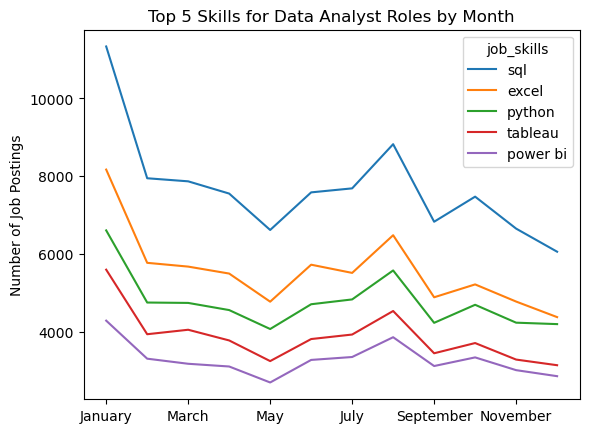

In [2]:
# From File 12
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Create a new column for the month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort the skills by count
df_DA_pivot.loc['total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))  
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analyst Roles by Month')
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.show()

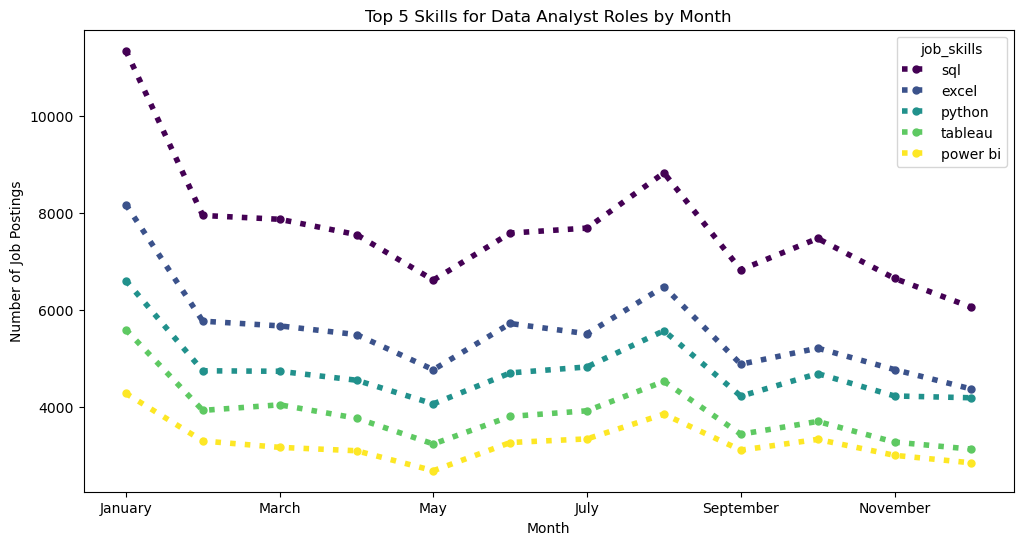

In [3]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    figsize=(12, 6),
    title='Top 5 Skills for Data Analyst Roles by Month',
    xlabel='Month',
    ylabel='Number of Job Postings',
    colormap='viridis',
    marker='o',
    linewidth=4,
    linestyle=':',
    markersize=5
)

plt.show()

In [4]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

#Calculate the average salary and count of job postings for each skill
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


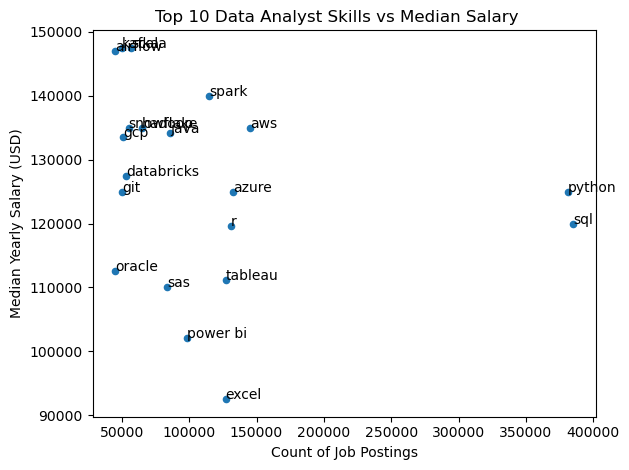

In [5]:
skill_stats.plot(kind = 'scatter', x='skill_count', y='median_salary', title='Top 10 Data Analyst Skills vs Median Salary   ')

for i, txt in enumerate(skill_stats.index): 
    plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i],
             txt)
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.tight_layout()
plt.show()

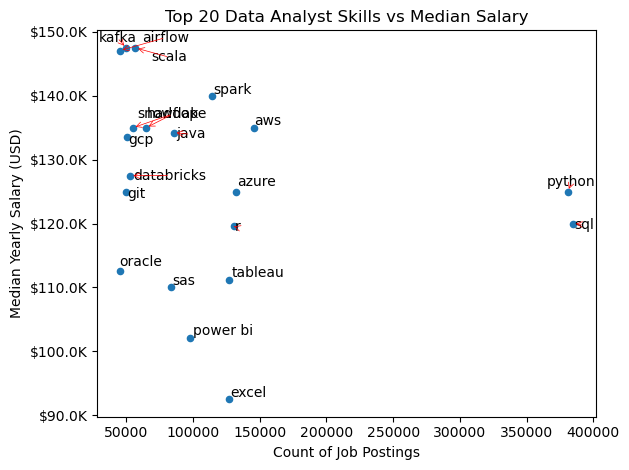

In [13]:
from adjustText import adjust_text

skill_stats.plot(kind = 'scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index): 
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i],
             txt))
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='red', lw=0.5),
            force_points=0.1,
            force_text=0.1,
            expand_points=(1.2, 1.2),
            expand_text=(1.2, 1.2))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}K'))
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 20 Data Analyst Skills vs Median Salary')
plt.tight_layout()
plt.show()

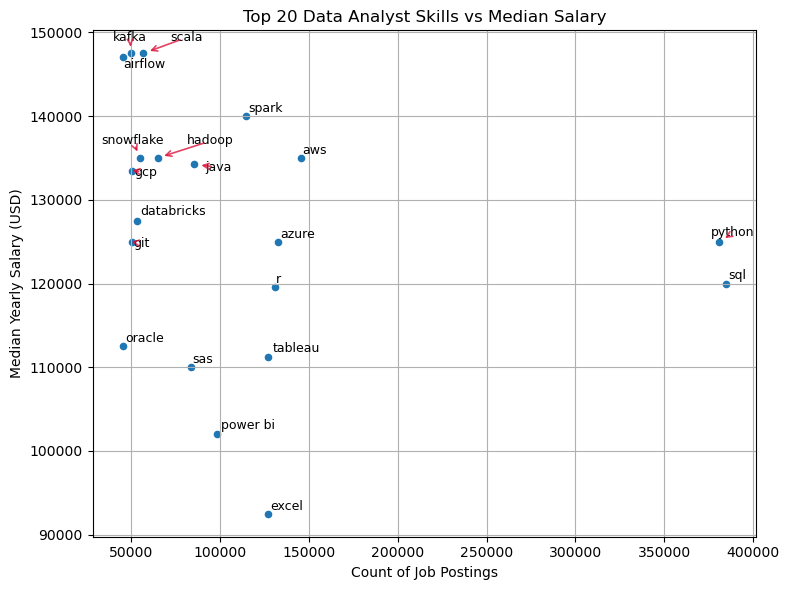

In [11]:

from adjustText import adjust_text
import matplotlib.pyplot as plt

# Create the scatter plot
ax = skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(8, 6))

# Add text annotations
texts = []
for i, txt in enumerate(skill_stats.index):
    x = skill_stats['skill_count'].iloc[i]
    y = skill_stats['median_salary'].iloc[i]
    texts.append(plt.text(x, y, txt, fontsize=9))

# Use adjust_text with better parameters
adjust_text(
    texts,
    x=skill_stats['skill_count'],
    y=skill_stats['median_salary'],
    arrowprops=dict(
        arrowstyle='->',
        color='crimson',
        linewidth=1.2,
        shrinkA=5,
        shrinkB=5,
        alpha=0.8
    ),
    force_points=0.5,       # Stronger repelling force
    force_text=0.5,
    expand_points=(1.4, 1.4),
    expand_text=(1.4, 1.4),
    only_move={'points':'y', 'texts':'xy'},  # Prevent chaotic movement
    lim=500  # Try more adjustment steps
)

# Final plot touches
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 20 Data Analyst Skills vs Median Salary')
plt.grid(True)
plt.tight_layout()
plt.show()
